<a href="https://colab.research.google.com/github/ishitaka-code/TA/blob/master/TA%E9%9B%BB%E6%B0%97%E4%BC%9D%E5%B0%8E_%E7%89%A9%E7%90%86%E5%AD%A6%E5%AE%9F%E9%A8%93II%E3%80%8C%E5%8D%8A%E5%B0%8E%E4%BD%93%E7%89%A9%E7%90%86%E3%80%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 物理学実験II「半導体物理」，テーマ：電気伝導

## テキストp12の考察5.のためのJupyter Notebook (Python)．

* Google [Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ja)は，クラウド上で動作するJupyter Notebookであり，環境構築不要で[Python](https://ja.wikipedia.org/wiki/Python)が記述，実行できます．（※ログイン必須．時間制限あり．）[Jupyter Notebook](https://ja.wikipedia.org/wiki/Project_Jupyter)は，ブラウザベースのインタラクティブなプログラム実行環境．
* 自分のGoogleドライブにコピーを保存：[ファイル] → [ドライブにコピーを保存]．
* 各セルを実行するときは「Shift + Enter」または「Ctrl + Enter」．「#」に続けて書いた文章はコメントで，実行されません．
* plt.savefigなどで出力されたファイルは左の「ファイル」タブからダウンロードできます．
* Pythonはインデントが重要な意味を持ちます．
 * [Python学習スライド教材](https://mitani.cs.tsukuba.ac.jp/book_support/python/)
 * [Python3チートシート(基本編)](https://qiita.com/1429takahiro/items/710a877b1afb1626334f)
 * [Pythonプログラミング入門](https://utokyo-ipp.github.io)

In [ ]:
# 必要なパッケージのインストール
%%capture
!pip install japanize_matplotlib

In [ ]:
# 必要なパッケージのインポート
import numpy as np
from scipy import optimize  # 解を求めるときに使用
import japanize_matplotlib  # matplotlibの日本語文字化け回避
import matplotlib.pyplot as plt
# プロット見た目調整
plt.rcParams["xtick.direction"] = "in"      # x軸の目盛線を内向きに
plt.rcParams["ytick.direction"] = "in"      # y軸の目盛線を内向きに
plt.rcParams["xtick.minor.visible"] = True  # x軸補助目盛りの追加
plt.rcParams["ytick.minor.visible"] = True  # y軸補助目盛りの追加

テキストp.12に示されている$n(T)$の式を用いる．
$$
n(T) = 4.83 \times 10^{15} \left( \frac{m_e^*}{m_0} \cdot \frac{m_h^*}{m_0} \right)^{ 3/4 } T^{3/2} \exp \left( -\frac{E_g}{2 k_B T} \right) \ {\rm [cm^{-3}]}
$$
$E_g$は以下で与えられる温度依存のバンドギャップエネルギー（Varshniによる経験則）を代入する．
$$
E_g(T) = E_g(0)-\frac{\alpha T^2}{T+\beta}
$$
（下記計算では温度依存性が考慮されておらず$E_g=1.12$ [eV]の定数になっています．）

In [ ]:
# 各定数の定義
kb = 1.380622* 10**(-23)    # [J/K]
e = 1.6021917* 10**(-19)    # [C]
m0 = 9.1093837015* 10**(-31) # [kg]
mLe = 0.98* m0  # 電子の縦有効質量
mTe = 0.19* m0  # 電子の横有効質量
mlh = 0.16* m0  # 軽い正孔の有効質量
mhh = 0.49* m0  # 重い正孔の有効質量
mde = (mLe * mTe * mTe)**(1/3)          # 電子の状態密度有効質量
mdh = (mlh**(3/2) + mhh**(3/2))**(2/3)  # 正孔の状態密度有効質量
print("mde/m0: ", mde/m0)
print("mdh/m0: ", mdh/m0)

mde/m0:  0.3282800008427023
mdh/m0:  0.5491988335344692


In [ ]:
# def EgeV(T): # 温度依存のEg [eV]


def nHighTemp(T): # 真性領域のキャリア密度 [/cm3]
    return 4.83 * 10**15 * ((mde/m0)*(mdh/m0))**(3/4) * T**(3/2) * np.exp(- 1.12/(2*(kb/e)*T))

In [ ]:
# 実験により決定した値 [/cm3]
Nd = 4.83*(10**15)

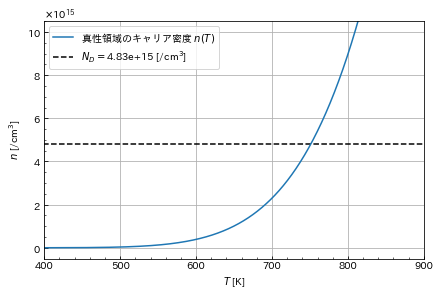

In [ ]:
# プロット用データの作成
Temp = np.linspace(300, 1000, 1000*2)
nHighTempData = nHighTemp(Temp)

# n(T)とNdをプロットして確認
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(Temp, nHighTempData, label="真性領域のキャリア密度 $n(T)$")
ax.hlines(y=Nd, xmin=0, xmax=Temp.max(), 
          linestyle="--", label="$N_D=$"+'{:.2e}'.format(Nd)+" [/cm$^3$]")
ax.set_xlabel("$T$ [K]")
ax.set_ylabel("$n$ [/cm$^3$]")
ax.set_xlim(400,900)
ymax=10**16
ax.set_ylim(-ymax*0.05,ymax*1.05)
ax.ticklabel_format(axis='y', scilimits=(15,15), useMathText=True)
ax.grid()
ax.legend()
plt.show()

$f(T) = n(T)-N_D$と置いて$f(T)=0$の解を数値的に求める．

参考リンク


*   [Optimization and root finding (scipy.optimize)](https://docs.scipy.org/doc/scipy/reference/optimize.html)
*   [pythonで学ぶ計算物理 ドキュメント » 8. 非線型方程式 » 8.1. 非線型方程式の解法](http://www.physics.okayama-u.ac.jp/~otsuki/lecture/CompPhys2/root_find/root_find.html#)
*   [ニュートン法(Newton's method)](http://www.yamamo10.jp/yamamoto/lecture/2007/5E_comp_app/nonlinear_equation/nonlinear_eq_html/node4.html)
*   [二分法(bisection method)](http://www.yamamo10.jp/yamamoto/lecture/2007/5E_comp_app/nonlinear_equation/nonlinear_eq_html/node3.html)

In [ ]:
def f(T):
    return nHighTemp(T) - Nd

# 近傍の１つの初期値から解を探索（ニュートン法，導関数が与えられない場合はセカント法）．
# SolvedT = optimize.newton(f, 700)

# 指定した区間内の解を探索（二分法）．遅いが確実．
SolvedT = optimize.bisect(f, 700, 800)

# 指定した区間内の解を探索（ブレント法）．二分法の改良，一般的に広く使われ優れている．
# SolvedT = optimize.brentq(f, 700, 800)

print("解 [K]: ", SolvedT)

解 [K]:  751.4587513627973


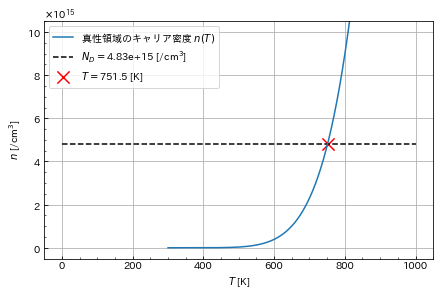

In [ ]:
# 結果をプロットして図を保存する
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(Temp, nHighTempData, 
        label="真性領域のキャリア密度 $n(T)$")
ax.hlines(y=Nd, xmin=0, xmax=Temp.max(), linestyle="--", 
          label="$N_D=$"+'{:.2e}'.format(Nd)+" [/cm$^3$]")
ax.scatter(x=SolvedT, y=nHighTemp(SolvedT), marker="x",s=150,c='red', 
           label="$T = $"+'{:.1f}'.format(SolvedT)+" [K]")
ax.set_xlabel("$T$ [K]")
ax.set_ylabel("$n$ [/cm$^3$]")
# ax.set_xlim(600,800)
ymax=10**16
ax.set_ylim(-ymax*0.05,ymax*1.05)
ax.ticklabel_format(axis='y', scilimits=(15,15), useMathText=True)
ax.grid()
ax.legend()
plt.savefig('plot.svg', bbox_inches='tight') # 図の保存
# plt.savefig('plot.png', bbox_inches='tight', dpi=300) # 図の保存
plt.show()


---

おまけ，不純物領域を重ねてみる．

In [ ]:
def nLowTemp(T):
    Eion = 0.032 # 実験データから決定
    return (1/np.sqrt(2))*4.83*(10**15)*(((mde/m0)*(mdh/m0))**(3/4))*(T**(3/2))*np.exp( -Eion/(2*(kb/e)*T) )

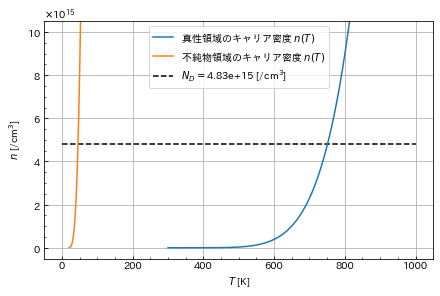

In [ ]:
# プロット用データの作成
LowTemp = np.linspace(20, 100, 100*2)
nLowTempData = nLowTemp(LowTemp)

# プロットする
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(Temp, nHighTempData, label="真性領域のキャリア密度 $n(T)$")
ax.hlines(y=Nd, xmin=0, xmax=Temp.max(), linestyle="--", 
          label="$N_D=$"+'{:.2e}'.format(Nd)+" [/cm$^3$]")
ax.plot(LowTemp, nLowTempData, label="不純物領域のキャリア密度 $n(T)$")
ax.set_xlabel("$T$ [K]")
ax.set_ylabel("$n$ [/cm$^3$]")
# ax.set_xlim(600,800)
ymax=10**16
ax.set_ylim(-ymax*0.05,ymax*1.05)
ax.ticklabel_format(axis='y', scilimits=(15,15), useMathText=True)
ax.grid()
ax.legend()
plt.show()